# Apollo Missions Lab
Kanjonavo Sabud; PHYS265; 0101

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import scipy.integrate as integrate

In [2]:
G = 6.67E-11
g = 9.81

M_E = 5.9E24
M_M  = 7.3E22

M_APOLLO = 5500

RAD_E = 6378
RAD_M = 1737

DIST_E_TO_M = 3.8E8

Ve = 2.4E3
mdot  = 1.3E4
m0 = 2.4E6 # changed from 2.4E3 as wet mass would then be < dry mass
mf = 7.5E5

## Part 1

In [3]:
def gravfunc(M, xm, ym, x, y):
    r = np.sqrt((xm - x)**2 + (ym - y)**2)
    return np.where(np.isclose(r, 0, atol=1e-2), np.nan, -(G*M)/r)

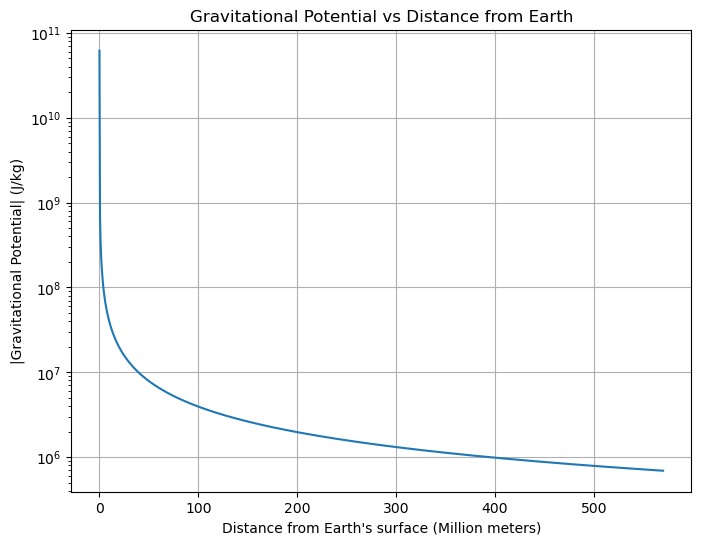

In [4]:
distances = np.linspace(RAD_E, 1.5 * DIST_E_TO_M, 1000)
potentials = [np.abs(gravfunc(M_E, 0, 0, d, 0)) for d in distances]

plt.figure(figsize=(8, 6))
plt.plot(distances / 1e6, potentials)
plt.yscale('log')
plt.xlabel("Distance from Earth's surface (Million meters)")
plt.ylabel("|Gravitational Potential| (J/kg)")
plt.title("Gravitational Potential vs Distance from Earth")
plt.grid()
plt.show()

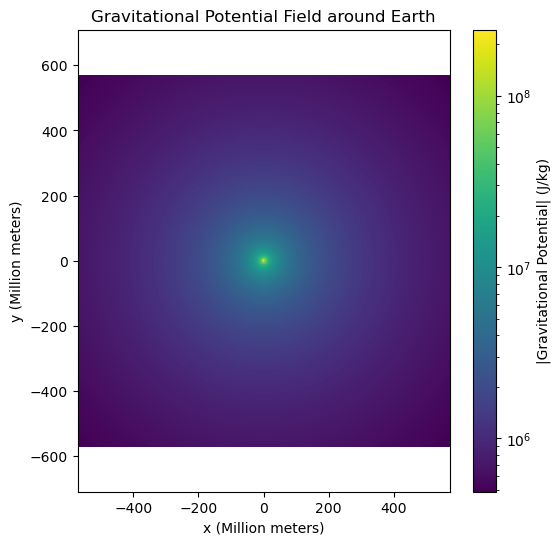

In [5]:
x_range = np.linspace(-1.5 * DIST_E_TO_M, 1.5 * DIST_E_TO_M, 500)
y_range = np.linspace(-1.5 * DIST_E_TO_M, 1.5 * DIST_E_TO_M, 500)
X, Y = np.meshgrid(x_range, y_range)
Phi = np.abs(gravfunc(M_E, 0, 0, X, Y))

plt.figure(figsize=(6, 6))
c = plt.pcolormesh(X / 1e6, Y / 1e6, Phi, shading='auto', norm=LogNorm())
plt.colorbar(c, label="|Gravitational Potential| (J/kg)")
plt.xlabel("x (Million meters)")
plt.ylabel("y (Million meters)")
plt.title("Gravitational Potential Field around Earth")
plt.axis('equal')
plt.show()

## Part 2

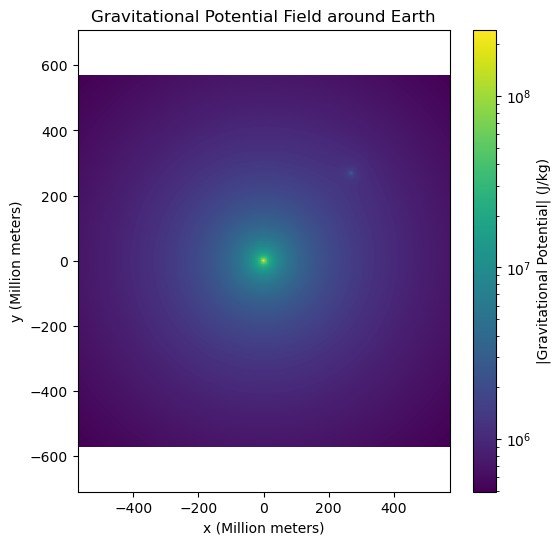

In [6]:
x_range = np.linspace(-1.5 * DIST_E_TO_M, 1.5 * DIST_E_TO_M, 500)
y_range = np.linspace(-1.5 * DIST_E_TO_M, 1.5 * DIST_E_TO_M, 500)
X, Y = np.meshgrid(x_range, y_range)

Phi_E = np.abs(gravfunc(M_E, 0, 0, X, Y))

x_m, y_m = DIST_E_TO_M/np.sqrt(2) , DIST_E_TO_M/np.sqrt(2)
Phi_M = np.abs(gravfunc(M_M, x_m, y_m, X, Y))

Phi = Phi_E + Phi_M

plt.figure(figsize=(6, 6))
c = plt.pcolormesh(X / 1e6, Y / 1e6, Phi, shading='auto', norm=LogNorm())
plt.colorbar(c, label="|Gravitational Potential| (J/kg)")
plt.xlabel("x (Million meters)")
plt.ylabel("y (Million meters)")
plt.title("Gravitational Potential Field around Earth")
plt.axis('equal')
plt.show()

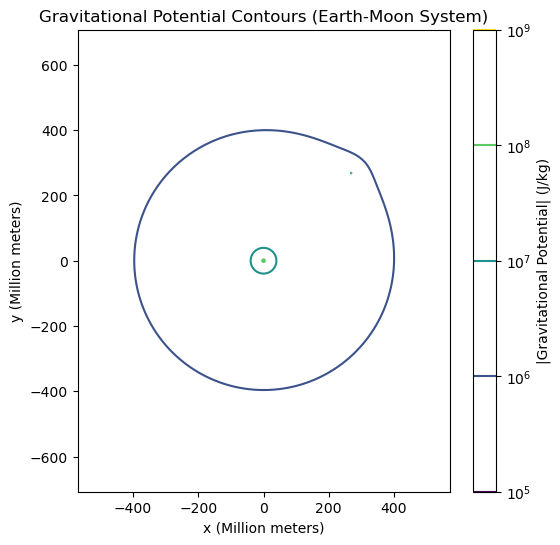

In [7]:
# 2D Contour plot
plt.figure(figsize=(6, 6))
contour = plt.contour(X / 1e6, Y / 1e6, Phi, levels=50, norm=LogNorm())
plt.colorbar(contour, label="|Gravitational Potential| (J/kg)")
plt.xlabel("x (Million meters)")
plt.ylabel("y (Million meters)")
plt.title("Gravitational Potential Contours (Earth-Moon System)")
plt.axis('equal')
plt.show()

## Part 3

In [8]:
def forcefield(m1,m2,x1,y1,x2,y2):
    dx = x2 - x1
    dy = y2 - y1
    r = np.sqrt(dx**2 + dy**2)
    F = G * m1 * m2 / r**2
    Fx = np.where(np.isclose(r,0,atol=1e-0), np.nan, F * (dx / r))
    Fy = np.where(np.isclose(r,0,atol=1e-0), np.nan, F * (dy / r))
    return Fx, Fy

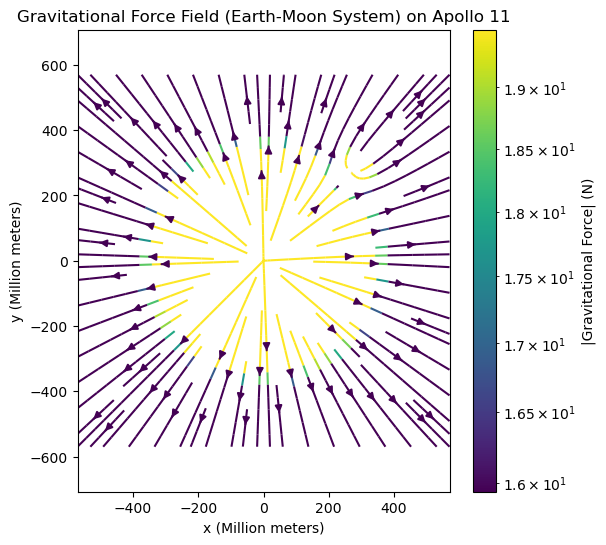

In [9]:
x_range = np.linspace(-1.5 * DIST_E_TO_M, 1.5 * DIST_E_TO_M, 500)
y_range = np.linspace(-1.5 * DIST_E_TO_M, 1.5 * DIST_E_TO_M, 500)
X, Y = np.meshgrid(x_range, y_range)

Force_Ex, Force_Ey = forcefield(M_E, M_APOLLO, 0, 0, X, Y)

x_m, y_m = DIST_E_TO_M/np.sqrt(2) , DIST_E_TO_M/np.sqrt(2)
Force_Mx, Force_My = forcefield(M_M, M_APOLLO, x_m, y_m, X, Y)

Force_Tx = Force_Ex + Force_Mx
Force_Ty = Force_Ey + Force_My

# 2D Streamplot of the gravitational force field
plt.figure(figsize=(6, 6))
plt.streamplot(X / 1e6, Y / 1e6, Force_Tx, Force_Ty, color=np.hypot(Force_Tx, Force_Ty), norm=LogNorm())
cbar = plt.colorbar()
cbar.set_label("|Gravitational Force| (N)")
plt.xlabel("x (Million meters)")
plt.ylabel("y (Million meters)")
plt.title("Gravitational Force Field (Earth-Moon System) on Apollo 11")
plt.axis('equal')
plt.show()

## Part 4

In [10]:
def burn_time(m0, mf, mdot):
    return (m0 - mf) / mdot

def delta_v(t, m0, mdot, mf, ve, g):
    m_t = m0 - mdot * t  # Current mass of the rocket
    if m_t <= mf:
        return 0  # No more fuel left, velocity change stops
    return ve * np.log(m0 / m_t) - g * t

def altitude(m0, mdot, mf, ve, g):
    T = burn_time(m0, mf, mdot)
    h, _ = integrate.quad(delta_v, 0, T, args=(m0, mdot, mf, ve, g))
    return h


In [11]:
T = burn_time(m0, mf, mdot)
h_burnout = altitude(m0, mdot, mf, Ve, g)

print(f"Burn time: {T:.2f} seconds")
print(f"Altitude at burnout: {h_burnout:.2f} meters")

Burn time: 126.92 seconds
Altitude at burnout: 64546.80 meters
